In [131]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [132]:
#Loading training Dataset
train = pd.read_csv('C:/Users/Lenovo/Desktop/IPY/HousePriceProblem/HousePricingTutorial_train.csv')

In [133]:
##The meaning of all the columns are...



##SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
##MSSubClass: The building class
##MSZoning: The general zoning classification
##LotFrontage: Linear feet of street connected to property
##LotArea: Lot size in square feet
##Street: Type of road access
##Alley: Type of alley access
##LotShape: General shape of property
##LandContour: Flatness of the property
##Utilities: Type of utilities available
##LotConfig: Lot configuration
##LandSlope: Slope of property
##Neighborhood: Physical locations within Ames city limits
##Condition1: Proximity to main road or railroad
##Condition2: Proximity to main road or railroad (if a second is present)
##BldgType: Type of dwelling
##HouseStyle: Style of dwelling
##OverallQual: Overall material and finish quality
##OverallCond: Overall condition rating
##YearBuilt: Original construction date
##YearRemodAdd: Remodel date
##RoofStyle: Type of roof
##RoofMatl: Roof material
##Exterior1st: Exterior covering on house
##Exterior2nd: Exterior covering on house (if more than one material)
##MasVnrType: Masonry veneer type
##MasVnrArea: Masonry veneer area in square feet
##ExterQual: Exterior material quality
##ExterCond: Present condition of the material on the exterior
##Foundation: Type of foundation
##BsmtQual: Height of the basement
##BsmtCond: General condition of the basement
##BsmtExposure: Walkout or garden level basement walls
##BsmtFinType1: Quality of basement finished area
##BsmtFinSF1: Type 1 finished square feet
##BsmtFinType2: Quality of second finished area (if present)
##BsmtFinSF2: Type 2 finished square feet
##BsmtUnfSF: Unfinished square feet of basement area
##TotalBsmtSF: Total square feet of basement area
##Heating: Type of heating
##HeatingQC: Heating quality and condition
##CentralAir: Central air conditioning
##Electrical: Electrical system
##1stFlrSF: First Floor square feet
##2ndFlrSF: Second floor square feet
##LowQualFinSF: Low quality finished square feet (all floors)
##GrLivArea: Above grade (ground) living area square feet
##BsmtFullBath: Basement full bathrooms
##BsmtHalfBath: Basement half bathrooms
##FullBath: Full bathrooms above grade
##HalfBath: Half baths above grade
##Bedroom: Number of bedrooms above basement level
##Kitchen: Number of kitchens
##KitchenQual: Kitchen quality
##TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
##Functional: Home functionality rating
##Fireplaces: Number of fireplaces
##FireplaceQu: Fireplace quality
##GarageType: Garage location
##GarageYrBlt: Year garage was built
##GarageFinish: Interior finish of the garage
##GarageCars: Size of garage in car capacity
##GarageArea: Size of garage in square feet
##GarageQual: Garage quality
##GarageCond: Garage condition
##PavedDrive: Paved driveway
##WoodDeckSF: Wood deck area in square feet
##OpenPorchSF: Open porch area in square feet
##EnclosedPorch: Enclosed porch area in square feet
##3SsnPorch: Three season porch area in square feet
##ScreenPorch: Screen porch area in square feet
##PoolArea: Pool area in square feet
##PoolQC: Pool quality
##Fence: Fence quality
##MiscFeature: Miscellaneous feature not covered in other categories
##MiscVal: $Value of miscellaneous feature
##MoSold: Month Sold
##YrSold: Year Sold
##SaleType: Type of sale
##SaleCondition: Condition of sale

In [134]:
#Shape of train data
train.shape

(1458, 81)

Skew is: 0.12173541793810867


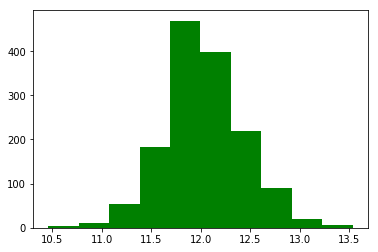

In [135]:
train['SalePrice'] = np.log1p(train['SalePrice'])

target = train['SalePrice']
print ("Skew is:", target.skew())
plt.hist(target, color='green')
plt.show()

In [136]:
#Finding all the Numerical columns
numeric_features = train.select_dtypes(include=[np.number])

In [137]:
#Finding the first five features that are most positively correlated with SalePrice
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')

SalePrice      1.000000
OverallQual    0.817178
GrLivArea      0.700871
GarageCars     0.680653
GarageArea     0.650867
Name: SalePrice, dtype: float64 



In [138]:
#Understanding NULL values and sorting them !
Isnull=train.isnull().sum()
Isnull.sort_values(inplace=True, ascending=False)
print(Isnull)

PoolQC           1451
MiscFeature      1404
Alley            1367
Fence            1177
FireplaceQu       688
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [139]:
#Examining the NULL values and filling with appropriate values:
#There are 19 columns with NULLs.

# PoolQC           1453
# MiscFeature      1406
# Alley            1369
# Fence            1179
# FireplaceQu       690
# LotFrontage       259
# GarageCond         81
# GarageType         81
# GarageYrBlt        81
# GarageFinish       81
# GarageQual         81
# BsmtExposure       38
# BsmtFinType2       38
# BsmtFinType1       37
# BsmtCond           37
# BsmtQual           37
# MasVnrArea          8
# MasVnrType          8
# Electrical          1


train['PoolQC'] = train['PoolQC'].fillna('None')
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
train['GarageType'] = train['GarageType'].fillna('None')
train['GarageFinish'] = train['GarageFinish'].fillna('None')
train['GarageCond'] = train['GarageCond'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None')
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [140]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(int(0))
train['GarageArea'] = train['GarageArea'].fillna(int(0))
train['GarageCars'] = train['GarageCars'].fillna(int(0))
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [141]:
#########################################################################################################

In [142]:
#Can Experiment-
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
#train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [143]:
#Can Experiment-
#train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [144]:
train['LotFrontage'] = train['LotFrontage'].fillna(int(0))
train['Electrical'] = train['Electrical'].fillna(int (0))

In [145]:
#########################################################################################################

In [146]:
#The total number of columns = 81
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [147]:
len(train.columns)

81

In [148]:
#Numerical Columns = 38
len(train.select_dtypes(include=[np.number]).columns.tolist())

38

In [149]:
#Non-Numerical Columns = 43
len(train.select_dtypes(exclude=[np.number]).columns.tolist())

43

In [150]:
38+43

81

In [151]:
#Converting  Non-Numerical (COUNT=43) ---> Numerical (COUNT=43)
nonNumColumns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir',  
        'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating','Utilities')

In [152]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in nonNumColumns:
    train = create_dummies(train,column)    

In [153]:
train.shape

(1458, 348)

In [154]:
print(list(train.columns))

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [155]:
train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Electrical_Mix,Electrical_SBrkr,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Utilities_AllPub,Utilities_NoSeWa
0,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,1,0,1,0,0,0,0,1,0
1,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,1,0,1,0,0,0,0,1,0
2,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,1,0,1,0,0,0,0,1,0
3,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,1,0,1,0,0,0,0,1,0
4,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,1,0,1,0,0,0,0,1,0
5,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,1,0,1,0,0,0,0,1,0
6,8,60,RL,0.0,10382,Pave,None,IR1,Lvl,AllPub,...,0,1,0,1,0,0,0,0,1,0
7,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
8,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,1,0,1,0,0,0,0,1,0
9,11,20,RL,70.0,11200,Pave,None,Reg,Lvl,AllPub,...,0,1,0,1,0,0,0,0,1,0


In [156]:
train['GarageCars']

0       2
1       2
2       3
3       3
4       2
5       2
6       2
7       2
8       1
9       1
10      3
11      1
12      3
13      1
14      2
15      2
16      2
17      2
18      1
19      3
20      1
21      2
22      2
23      1
24      3
25      2
26      3
27      1
28      1
29      1
       ..
1428    2
1429    2
1430    2
1431    1
1432    2
1433    2
1434    2
1435    2
1436    3
1437    2
1438    2
1439    2
1440    2
1441    3
1442    1
1443    2
1444    1
1445    1
1446    2
1447    1
1448    0
1449    0
1450    3
1451    2
1452    0
1453    2
1454    2
1455    2
1456    1
1457    1
Name: GarageCars, Length: 1458, dtype: int64

In [157]:
#nonNumColumnsforSparse = [];
#for col in nonNumColumns:
    #for vals in list(train[col].unique()):
        #nonNumColumnsforSparse.append(vals)
        
#nonNumColumnsforSparse = set(nonNumColumnsforSparse)

In [159]:
 ['OverallQual','OverallCond','ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Ex','ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA','BsmtQual_TA','BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA','BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_None', 'BsmtCond_Po', 'BsmtCond_TA','BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_None', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf','BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_None', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA','LowQualFinSF',
                 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA','FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_None', 'FireplaceQu_Po', 'FireplaceQu_TA','GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_None', 'GarageQual_Po', 'GarageQual_TA','GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_None', 'GarageCond_Po', 'GarageCond_TA', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_None', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_None','MiscFeature_Gar2', 'MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC','MoSold','YrSold','SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD','SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
                 'OverallQual','GrLivArea','GarageCars','GarageArea']

['OverallQual',
 'OverallCond',
 'ExterQual_Ex',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Ex',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_Po',
 'ExterCond_TA',
 'BsmtQual_TA',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_None',
 'BsmtQual_TA',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_None',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_None',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_None',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'HeatingQC_Ex',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_Po',
 'HeatingQC_TA',
 'LowQualFinSF',
 'KitchenQual_Ex',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'FireplaceQu_Ex',
 'FireplaceQu_Fa',
 'FireplaceQu_Gd',
 'FireplaceQu_None',
 'FireplaceQu_Po',
 'FireplaceQu_TA',
 'GarageQual_Ex',
 'GarageQual_Fa',
 'GarageQ

In [160]:
#for newColumns in nonNumColumnsforSparse:
    #train[newColumns] =0

In [161]:
#CO-RELATION BETWEEN NUMERICS IS FOUND
#NULL FILLED
#NON-NUMERIC IS CONVERTED
#TIME TO APPLY MODEL

In [162]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

In [163]:
model = linear_model.LinearRegression()

In [164]:
#I picked up quality + Co-realation variables.
selectdColumns =  ['OverallQual','OverallCond','ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Ex','ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA','BsmtQual_TA','BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA','BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_None', 'BsmtCond_Po', 'BsmtCond_TA','BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_None', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf','BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_None', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA','LowQualFinSF',
                 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA','FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_None', 'FireplaceQu_Po', 'FireplaceQu_TA','GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_None', 'GarageQual_Po', 'GarageQual_TA','GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_None', 'GarageCond_Po', 'GarageCond_TA', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_None', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_None','MiscFeature_Gar2', 'MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC','MoSold','YrSold','SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD','SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
                 'OverallQual','GrLivArea','GarageCars','GarageArea']

In [165]:
model.fit(train[selectdColumns], train["SalePrice"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [166]:
all_X = train[selectdColumns]
all_y = train['SalePrice']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

model.fit(train_X, train_y)
predictions = model.predict(test_X)
print(predictions)

[12.36866727 12.38560389 12.58474702 12.74216312 11.9277782  11.78760002
 12.15526638 12.30146473 12.34525158 12.33526706 12.47073997 11.48220994
 11.63086287 12.15625361 11.39969603 11.25403132 12.39072974 11.58616714
 11.82326972 12.9265808  12.62439123 11.86576475 11.77803088 12.64182619
 12.91666356 12.53679315 12.07627976 11.60442518 12.03107885 13.0556886
 11.79479253 11.82204379 12.04351975 12.24539533 11.57920388 11.5788184
 12.21232147 12.09502924 11.65762302 11.47471689 11.98593493 12.12711278
 11.7762716  11.68806032 11.83393247 11.90767013 12.61410789 12.71881493
 12.90118155 12.20106148 12.38680985 12.76712019 11.82219731 11.84248982
 12.56051052 11.75807222 11.9493384  12.18023745 12.08770632 12.18822796
 11.91974853 12.89837416 12.0500594  12.45154936 11.68398334 12.75624656
 12.46226852 12.44223053 10.93859267 11.6161223  11.78102225 12.25154086
 12.3396848  12.06034974 12.3007041  11.96119857 11.23594244 12.2119882
 12.28783005 12.45234633 12.06553074 11.72410563 12.62

In [167]:
scores = cross_val_score(model, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print('----')
print(accuracy)

[0.59223921 0.76950479 0.81314486 0.82710792 0.82908132 0.83582516
 0.84979136 0.86510583 0.87822699 0.88111626]
----
0.8141143705261541


In [168]:
############  NOW TIME TO USE UNSEEN DATA #################

In [169]:
#Loading testing Dataset
test = pd.read_csv('C:/Users/Lenovo/Desktop/IPY/HousePriceProblem/HousePricingTutorial.csv')

FileNotFoundError: File b'C:/Users/Lenovo/Desktop/IPY/HousePriceProblem/HousePricingTutorial.csv' does not exist

In [ ]:
predictions =model.predict(test[selectdColumns])

In [ ]:
print(predictions)

In [122]:
# The above value means in $ as:

In [123]:
realvalues = np.expm1(predictions)
print(realvalues)

NameError: name 'predictions' is not defined

In [124]:
#The 'actual cost' versus the 'predicted value's':

In [125]:
#ACTUAL = 208500
#PREDICTED = 213273.94110526


#ACTUAL = 147500
#PREDICTED = 132910.96344037

In [126]:
#THE END